## Importing the essential libraries over here

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset over here

In [18]:
data=pd.read_csv("Temperature.csv")

In [19]:
data.head()

,State,Date,Value,Anomaly,Month,Year,Season
0,Alabama,201601,43.0,-1.9,1,2016,Winter
1,Alabama,201602,49.8,1.5,2,2016,Winter
2,Alabama,201603,59.7,4.9,3,2016,Spring
3,Alabama,201604,63.6,0.7,4,2016,Spring
4,Alabama,201605,70.2,-0.4,5,2016,Spring


## Taking care of duplicate observations if present over here

In [20]:
data.duplicated().sum()

0

## Taking care of missing values if present over here

In [21]:
data.isnull().sum()

State      0
Date       0
Value      0
Anomaly    0
Month      0
Year       0
Season     0
dtype: int64

In [22]:
missing_values=[feature for feature in data.columns if data[feature].isnull().sum()>1]
for feature in missing_values:
  print(feature)

## Filtering all the numerical features over here in the form of dataframe

In [24]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!="O"]
for feature in numerical_features:
  print(feature)

Date
Value
Anomaly
Month
Year


In [25]:
data[numerical_features]

,Date,Value,Anomaly,Month,Year
0,201601,43.0,-1.9,1,2016
1,201602,49.8,1.5,2,2016
2,201603,59.7,4.9,3,2016
3,201604,63.6,0.7,4,2016
4,201605,70.2,-0.4,5,2016
...,...,...,...,...,...
1808,201809,44.3,3.7,9,2018
1809,201810,33.8,8.3,10,2018
1810,201811,19.1,7.4,11,2018
1811,201812,9.1,5.4,12,2018


## Filtering all the categorical features over here in the form of dataframe

In [26]:
cat_features=[feature for feature in data.columns if data[feature].dtype=="O"]
for feature in cat_features:
  print(feature)

State
Season


In [27]:
data[cat_features]

,State,Season
0,Alabama,Winter
1,Alabama,Winter
2,Alabama,Spring
3,Alabama,Spring
4,Alabama,Spring
...,...,...
1808,Alaska,Fall
1809,Alaska,Fall
1810,Alaska,Fall
1811,Alaska,Winter


## Encoding the categorical features over here

In [28]:
data['State'].value_counts()

State
Alabama           37
Nevada            37
New Jersey        37
New Mexico        37
New York          37
North Carolina    37
North Dakota      37
Ohio              37
Oklahoma          37
Oregon            37
Pennsylvania      37
Rhode Island      37
South Carolina    37
South Dakota      37
Tennessee         37
Texas             37
Utah              37
Vermont           37
Virginia          37
Washington        37
West Virginia     37
Wisconsin         37
Wyoming           37
New Hampshire     37
Nebraska          37
Arizona           37
Montana           37
Arkansas          37
California        37
Colorado          37
Connecticut       37
Delaware          37
Florida           37
Georgia           37
Idaho             37
Illinois          37
Indiana           37
Iowa              37
Kansas            37
Kentucky          37
Louisiana         37
Maine             37
Maryland          37
Massachusetts     37
Michigan          37
Minnesota         37
Mississippi       37
Missour

In [29]:
State_mapping={}

# over here enumerate is used to iterate our the sequences
for index,State in enumerate(data['State'].unique()):
  State_mapping[State]=index

print(State_mapping)

{'Alabama': 0, 'Arizona': 1, 'Arkansas': 2, 'California': 3, 'Colorado': 4, 'Connecticut': 5, 'Delaware': 6, 'Florida': 7, 'Georgia': 8, 'Idaho': 9, 'Illinois': 10, 'Indiana': 11, 'Iowa': 12, 'Kansas': 13, 'Kentucky': 14, 'Louisiana': 15, 'Maine': 16, 'Maryland': 17, 'Massachusetts': 18, 'Michigan': 19, 'Minnesota': 20, 'Mississippi': 21, 'Missouri': 22, 'Montana': 23, 'Nebraska': 24, 'Nevada': 25, 'New Hampshire': 26, 'New Jersey': 27, 'New Mexico': 28, 'New York': 29, 'North Carolina': 30, 'North Dakota': 31, 'Ohio': 32, 'Oklahoma': 33, 'Oregon': 34, 'Pennsylvania': 35, 'Rhode Island': 36, 'South Carolina': 37, 'South Dakota': 38, 'Tennessee': 39, 'Texas': 40, 'Utah': 41, 'Vermont': 42, 'Virginia': 43, 'Washington': 44, 'West Virginia': 45, 'Wisconsin': 46, 'Wyoming': 47, 'Alaska': 48}


In [30]:
data['State']=data['State'].map(State_mapping)

In [31]:
data['Season'].value_counts()

Season
Winter    490
Spring    441
Summer    441
Fall      441
Name: count, dtype: int64

In [33]:
Season_mapping={}
for index,Season in enumerate(data['Season'].unique()):
  Season_mapping[Season]=index
print(Season_mapping)

{'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}


In [34]:
data['Season']=data['Season'].map(Season_mapping)

## year is also a categorical feature over here so therefore encoding that particular feature as well over here

In [35]:
data['Year'].value_counts()

Year
2016    588
2017    588
2018    588
2019     49
Name: count, dtype: int64

In [36]:
year_mapping={}
for index,Year in enumerate(data['Year'].unique()):
  year_mapping[Year]=index
print(year_mapping)

{2016: 0, 2017: 1, 2018: 2, 2019: 3}


In [37]:
data['Year']=data['Year'].map(year_mapping)

In [39]:
data['Date'].value_counts()

Date
201601    49
201708    49
201710    49
201711    49
201712    49
201801    49
201802    49
201803    49
201804    49
201805    49
201806    49
201807    49
201808    49
201809    49
201810    49
201811    49
201812    49
201709    49
201707    49
201602    49
201706    49
201603    49
201604    49
201605    49
201606    49
201607    49
201608    49
201609    49
201610    49
201611    49
201612    49
201701    49
201702    49
201703    49
201704    49
201705    49
201901    49
Name: count, dtype: int64

## Similar thing is there for the Date feature over here so therefore encoding that as well

In [40]:
date_mapping={}
for index,Date in enumerate(data['Date'].unique()):
  date_mapping[Date]=index
print(date_mapping)

{201601: 0, 201602: 1, 201603: 2, 201604: 3, 201605: 4, 201606: 5, 201607: 6, 201608: 7, 201609: 8, 201610: 9, 201611: 10, 201612: 11, 201701: 12, 201702: 13, 201703: 14, 201704: 15, 201705: 16, 201706: 17, 201707: 18, 201708: 19, 201709: 20, 201710: 21, 201711: 22, 201712: 23, 201801: 24, 201802: 25, 201803: 26, 201804: 27, 201805: 28, 201806: 29, 201807: 30, 201808: 31, 201809: 32, 201810: 33, 201811: 34, 201812: 35, 201901: 36}


In [41]:
data['Date']=data['Date'].map(date_mapping)

In [42]:
data

,State,Date,Value,Anomaly,Month,Year,Season
0,0,0,43.0,-1.9,1,0,0
1,0,1,49.8,1.5,2,0,0
2,0,2,59.7,4.9,3,0,1
3,0,3,63.6,0.7,4,0,1
4,0,4,70.2,-0.4,5,0,1
...,...,...,...,...,...,...,...
1808,48,32,44.3,3.7,9,2,3
1809,48,33,33.8,8.3,10,2,3
1810,48,34,19.1,7.4,11,2,3
1811,48,35,9.1,5.4,12,2,0


## Creating the features and labels over here

In [43]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

## Splitting the dataset into training set and testing set over here to avoid the problem of overfitting over here

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Training the model on the training dataset over here

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0),
    "Support Vector Machine": SVC(kernel='linear'),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    # "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

results = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

best_classifier = max(results, key=results.get)
best_accuracy = results[best_classifier]

print("Best Classifier:", best_classifier)
print("Accuracy:", best_accuracy)


Best Classifier: Random Forest
Accuracy: 0.9972451790633609


In [53]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [54]:
y_pred=classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[3 3]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [3 3]
 [0 0]
 [3 3]
 [2 2]
 [0 0]
 [2 3]
 [2 2]
 [3 3]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 2]
 [1 1]
 [3 3]
 [3 3]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [3 3]
 [0 0]
 [2 2]
 [0 0]
 [3 3]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [1 1]
 [3 3]
 [0 0]
 [1 1]
 [3 3]
 [2 2]
 [1 1]
 [0 0]
 [3 3]
 [1 1]
 [0 0]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [3 3]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [3 3]
 [0 0]
 [3 3]
 [0 0]
 [1 1]
 [2 2]
 [3 3]
 [3 3]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [2 3]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [3 3]
 [0 0]
 [0 0]
 [3 3]
 [1 1]
 [3 3]
 [0 0]
 [3 3]
 [0 0]
 [0 0]
 [1 1]
 [0 3]
 [1 1]
 [3 3]
 [0 0]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 3]
 [2 2]
 [3 3]
 [0 0]
 [0 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [3 0]
 [2 2]
 [0 0]

In [55]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9421487603305785
[[91  2  0  8]
 [ 3 75  0  0]
 [ 1  0 94  1]
 [ 2  0  4 82]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       101
           1       0.97      0.96      0.97        78
           2       0.96      0.98      0.97        96
           3       0.90      0.93      0.92        88

    accuracy                           0.94       363
   macro avg       0.94      0.94      0.94       363
weighted avg       0.94      0.94      0.94       363



In [57]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

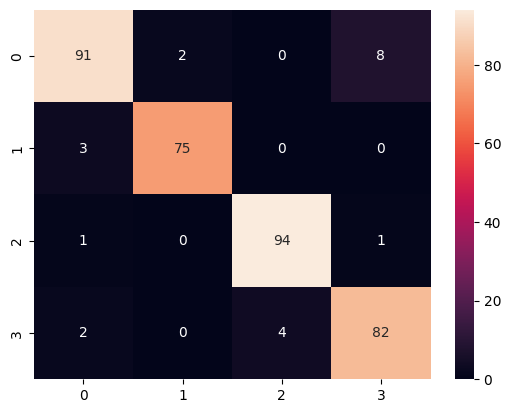

In [58]:
sns.heatmap(cm,annot=True)